In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from tqdm import tqdm
#import utils
from time import time
import pickle
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
D = np.load('arrays/D.npy')
X = np.load('arrays/X.npy')

# Problema a resolver
Se intenta resolver un problema similar al del paper https://arxiv.org/pdf/1704.07308.pdf. El problema es el siguiente:
$$min_A ||X - DA||_{F}^2$$

$$\text{ s.t. $A_{i,j}>0$ $\forall i,j$}$$

- $D$ (Matriz de diccionario): Es una matriz cuyas columnas son las bases del consumo de energeia electrico (se espera poder estimar el consumo sea una combinación lineal de estos vectores).

- $X$ (Matriz de datos a proyectar): Es una matriz en la que cada columna representa el consumo electrico de que se quiere proyectar sobre las columnas de $D$.

## Implementación
Se implementa mediante apgd. El tipo de aceleración que se elige es ADAM.

In [15]:
from apgd import adam_pgd
t1 = time()
A_simple, cost, losses_simple = adam_pgd(D, X)
t2 = time()
print(f'Tiempo: {t2-t1:.1f}')

[iter:0]	36890960.00
[iter:1000]	1265412.12
[iter:2000]	1184867.12
[iter:3000]	1147225.12
[iter:4000]	1123056.38
[iter:5000]	1106316.25
[iter:6000]	1094638.00
[iter:7000]	1086418.12
[iter:8000]	1080469.38
[iter:9000]	1076011.62
[iter:10000]	1072600.00
[iter:11000]	1069935.62
[iter:12000]	1067831.88
[iter:13000]	1066136.38
[iter:14000]	1064736.25
[iter:15000]	1063556.38
[iter:16000]	1062548.25
[iter:17000]	1061673.38
[iter:18000]	1060902.00
[iter:19000]	1060217.62
[iter:20000]	1059611.38
[iter:21000]	1059073.12
[iter:22000]	1058596.12
[iter:23000]	1058171.62
[iter:24000]	1057792.62
[iter:25000]	1057454.50
[iter:26000]	1057153.25
[iter:27000]	1056884.88
[iter:28000]	1056648.50
[iter:29000]	1056440.00
[iter:30000]	1056259.25
[iter:31000]	1056111.50
[iter:32000]	1055991.38
[iter:33000]	1055892.00
[iter:34000]	1055808.12
[iter:35000]	1055737.62
[iter:36000]	1055679.25
[iter:37000]	1055632.12
[iter:38000]	1055594.50
[iter:39000]	1055564.88
[iter:40000]	1055541.50
[iter:41000]	1055523.25
[ite

In [16]:
len(losses_s2k)

34856

In [17]:
losses_simple = np.array(losses_simple)
np.save('arrays/A_simple.npy', A_simple)
np.save('arrays/losses_simple.npy', losses_simple)

In [18]:
from utils import plot_loss

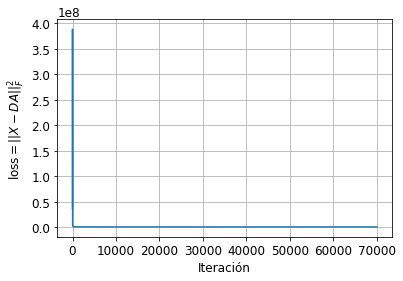

In [19]:
plot_loss(losses_simple)